## Data Pre-processing

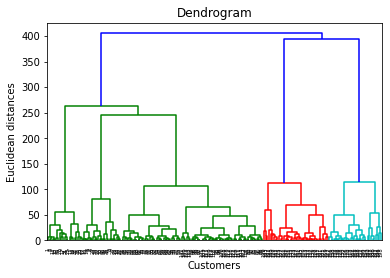

In [1]:
# Import modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Importing dataset
dataset = pd.read_csv('datasets/Mall_Customers.csv')

# # Separate dataset (X) and dependent vector (y)
X = dataset.filter(items=['Annual Income (k$)', 'Spending Score (1-100)'])

# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

# Optimal number of clusters is 5

## Hierarchical Clustering

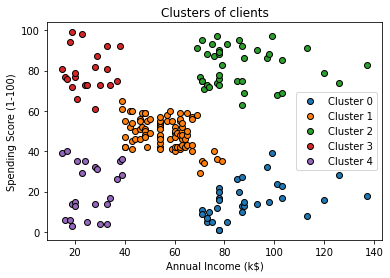

In [5]:
# Applying HC to the mall dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

# Visualizing the clusters
plot_set = pd.concat([X, pd.DataFrame(y_hc, columns=['y_kmeans'])], axis=1)
x1_column = 'Annual Income (k$)'
x2_column = 'Spending Score (1-100)'
y_column = 'y_kmeans'

for i in range(0, 5):
    subset = plot_set.loc[lambda df: df[y_column] == i, :]
    plt.scatter(subset.loc[:, x1_column], subset.loc[:, x2_column], label='Cluster ' + str(i), edgecolor='black', linewidth='1')
plt.title('Clusters of clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
